# Pandas

Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

Library documentation: <a>http://pandas.pydata.org/</a>

### General

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# create a series
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

# DataFrames

DataFrames are the workhorse of pandas and are directly inspired by the R programming language. We can think of a DataFrame as a bunch of Series objects put together to share the same index. Let's use pandas to explore this topic!

In [3]:
# create a data frame
dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.372504,-1.020323,0.054175,1.561823
2013-01-02,1.599933,-0.118304,0.743783,0.082489
2013-01-03,-2.401080,-0.025153,-0.182527,1.787144
2013-01-04,-1.616429,1.332620,-1.734828,0.958703
2013-01-05,1.283551,0.640375,-2.052255,1.039804
2013-01-06,0.218342,-0.111246,0.014738,-0.903960


In [4]:
# another way to create a data frame
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
      'D' : np.array([3] * 4,dtype='int32'),
      'E' : 'foo' })
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


In [5]:
#Another way of creating data fram ;p

from numpy.random import randn
np.random.seed(101)

df3 = pd.DataFrame(randn(6,4),index='A B C D E F'.split(),columns='W X Y Z'.split())

df3

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509
F,0.302665,1.693723,-1.706086,-1.159119


In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

In [7]:
df.head()

,A,B,C,D
2013-01-01,-0.372504,-1.020323,0.054175,1.561823
2013-01-02,1.599933,-0.118304,0.743783,0.082489
2013-01-03,-2.401080,-0.025153,-0.182527,1.787144
2013-01-04,-1.616429,1.332620,-1.734828,0.958703
2013-01-05,1.283551,0.640375,-2.052255,1.039804


In [8]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [10]:
df.values

array([[-0.37250383, -1.0203232 ,  0.05417512,  1.56182326],
       [ 1.59993253, -0.11830355,  0.74378254,  0.0824888 ],
       [-2.4010802 , -0.02515302, -0.18252719,  1.78714372],
       [-1.61642921,  1.33262006, -1.73482798,  0.95870257],
       [ 1.28355095,  0.6403749 , -2.05225486,  1.03980383],
       [ 0.218342  , -0.11124628,  0.01473848, -0.90395958]])

In [11]:
# quick data summary
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.214698,0.116328,-0.526152,0.754334
std,1.580834,0.796596,1.109057,1.004321
min,-2.401080,-1.020323,-2.052255,-0.903960
25%,-1.305448,-0.116539,-1.346753,0.301542
50%,-0.077081,-0.068200,-0.083894,0.999253
75%,1.017249,0.473993,0.044316,1.431318
max,1.599933,1.332620,0.743783,1.787144


In [12]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.372504,1.599933,-2.401080,-1.616429,1.283551,0.218342
B,-1.020323,-0.118304,-0.025153,1.332620,0.640375,-0.111246
C,0.054175,0.743783,-0.182527,-1.734828,-2.052255,0.014738
D,1.561823,0.082489,1.787144,0.958703,1.039804,-0.903960


In [13]:
# axis 0 is index, axis 1 is columns
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.561823,0.054175,-1.020323,-0.372504
2013-01-02,0.082489,0.743783,-0.118304,1.599933
2013-01-03,1.787144,-0.182527,-0.025153,-2.401080
2013-01-04,0.958703,-1.734828,1.332620,-1.616429
2013-01-05,1.039804,-2.052255,0.640375,1.283551
2013-01-06,-0.903960,0.014738,-0.111246,0.218342


In [14]:
# can sort by values too
# df.sort(columns='B')

### Selection

In [15]:
# select a column (yields a series)
df3['W']

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
F    0.302665
Name: W, dtype: float64

In [16]:
# column names also attached to the object
df.A

2013-01-01   -0.372504
2013-01-02    1.599933
2013-01-03   -2.401080
2013-01-04   -1.616429
2013-01-05    1.283551
2013-01-06    0.218342
Freq: D, Name: A, dtype: float64

In [17]:
# slicing works
df[0:3]

,A,B,C,D
2013-01-01,-0.372504,-1.020323,0.054175,1.561823
2013-01-02,1.599933,-0.118304,0.743783,0.082489
2013-01-03,-2.401080,-0.025153,-0.182527,1.787144


In [18]:
#Pass List of columns
df3[['W','X']]

,W,X
A,2.706850,0.628133
B,0.651118,-0.319318
C,-2.018168,0.740122
D,0.188695,-0.758872
E,0.190794,1.978757
F,0.302665,1.693723


In [19]:
# create new column
# df3['new'] = df['W'] + df['Y']

In [20]:
# cross-section using a label
df.loc[dates[0]]

A   -0.372504
B   -1.020323
C    0.054175
D    1.561823
Name: 2013-01-01 00:00:00, dtype: float64

In [21]:
# getting a scalar value
df.loc[dates[0], 'A']

-0.3725038255262222

In [22]:
# select via position
df.iloc[3]

A   -1.616429
B    1.332620
C   -1.734828
D    0.958703
Name: 2013-01-04 00:00:00, dtype: float64

In [23]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-1.616429,1.332620
2013-01-05,1.283551,0.640375


In [24]:
# column slicing
df.iloc[:,1:3]

,B,C
2013-01-01,-1.020323,0.054175
2013-01-02,-0.118304,0.743783
2013-01-03,-0.025153,-0.182527
2013-01-04,1.332620,-1.734828
2013-01-05,0.640375,-2.052255
2013-01-06,-0.111246,0.014738


In [25]:
# get a value by index
df.iloc[1,1]

-0.11830355244494256

In [26]:
# boolean indexing
df[df.A > 0]

,A,B,C,D
2013-01-02,1.599933,-0.118304,0.743783,0.082489
2013-01-05,1.283551,0.640375,-2.052255,1.039804
2013-01-06,0.218342,-0.111246,0.014738,-0.903960


In [27]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,0.054175,1.561823
2013-01-02,1.599933,NaN,0.743783,0.082489
2013-01-03,NaN,NaN,NaN,1.787144
2013-01-04,NaN,1.332620,NaN,0.958703
2013-01-05,1.283551,0.640375,NaN,1.039804
2013-01-06,0.218342,NaN,0.014738,NaN


In [28]:
# filtering
df3 = df.copy()
df3['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df3[df3['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-2.401080,-0.025153,-0.182527,1.787144,two
2013-01-05,1.283551,0.640375,-2.052255,1.039804,four


In [29]:
# setting examples
df.at[dates[0],'A'] = 0
df.iat[0,1] = 0
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D
2013-01-01,0.000000,0.000000,0.054175,5
2013-01-02,1.599933,-0.118304,0.743783,5
2013-01-03,-2.401080,-0.025153,-0.182527,5
2013-01-04,-1.616429,1.332620,-1.734828,5
2013-01-05,1.283551,0.640375,-2.052255,5
2013-01-06,0.218342,-0.111246,0.014738,5


In [30]:
# dealing with missing data
df4 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])
df4.loc[dates[0]:dates[1],'E'] = 1
df4

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.054175,5,1.0
2013-01-02,1.599933,-0.118304,0.743783,5,1.0
2013-01-03,-2.401080,-0.025153,-0.182527,5,NaN
2013-01-04,-1.616429,1.332620,-1.734828,5,NaN


In [31]:
# drop rows with missing data
df4.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.054175,5,1.0
2013-01-02,1.599933,-0.118304,0.743783,5,1.0


In [32]:
# fill missing data
df4.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.054175,5,1.0
2013-01-02,1.599933,-0.118304,0.743783,5,1.0
2013-01-03,-2.401080,-0.025153,-0.182527,5,5.0
2013-01-04,-1.616429,1.332620,-1.734828,5,5.0


In [33]:
# boolean mask for nan values
pd.isnull(df4)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


### Operations

In [34]:
df.mean()

A   -0.152614
B    0.286382
C   -0.526152
D    5.000000
dtype: float64

In [35]:
# pivot the mean calculation
df.mean(1)

2013-01-01    1.263544
2013-01-02    1.806353
2013-01-03    0.597810
2013-01-04    0.745341
2013-01-05    1.217918
2013-01-06    1.280459
Freq: D, dtype: float64

In [36]:
# aligning objects with different dimensions
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)
df.sub(s,axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-3.401080,-1.025153,-1.182527,4.0
2013-01-04,-4.616429,-1.667380,-4.734828,2.0
2013-01-05,-3.716449,-4.359625,-7.052255,0.0
2013-01-06,NaN,NaN,NaN,NaN


In [37]:
# applying functions
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,0.054175,5
2013-01-02,1.599933,-0.118304,0.797958,10
2013-01-03,-0.801148,-0.143457,0.615430,15
2013-01-04,-2.417577,1.189163,-1.119398,20
2013-01-05,-1.134026,1.829538,-3.171652,25
2013-01-06,-0.915684,1.718292,-3.156914,30


In [38]:
df.apply(lambda x: x.max() - x.min())

A    4.001013
B    1.450924
C    2.796037
D    0.000000
dtype: float64

In [39]:
# simple count aggregation
s = pd.Series(np.random.randint(0,7,size=10))
s.value_counts()

4    3
3    2
1    2
0    2
2    1
dtype: int64

### Merging / Grouping / Shaping

In [40]:
# concatenation
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.392448,0.321788,1.029048,-0.272079
1,2.060797,-1.046867,-2.273739,1.218096
2,-0.662684,0.420491,-0.260526,0.389780
3,0.164244,-0.371581,-0.050739,2.434601
4,1.241440,0.190978,-1.245347,0.952183
5,1.301380,-0.167320,0.050221,1.556790
6,1.345434,1.501737,-0.633348,-0.487281
7,-1.647469,0.543758,-1.210949,-0.365949
8,0.632181,-0.393214,-1.826066,1.257824
9,1.291497,-0.200139,1.255905,-0.621076


In [41]:
# SQL-style join
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [42]:
# append
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.090848,0.439521,-0.615106,-1.609852
1,0.687993,-0.119198,-1.030354,1.285524
2,-0.833620,-1.139580,2.616705,0.138355
3,0.565277,0.035679,0.113275,-1.408936
4,0.662552,-0.196561,0.328227,1.187040
5,-1.163697,-0.512252,-1.137829,-0.004349
6,1.981283,-1.088384,-1.171492,0.394484
7,-0.807910,1.072566,0.178465,-0.543535
8,0.565277,0.035679,0.113275,-1.408936


In [43]:
df = pd.DataFrame(
    { 'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
      'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
      'C' : np.random.randn(8),
      'D' : np.random.randn(8) })
df

,A,B,C,D
0,foo,one,-1.299735,-0.605139
1,bar,one,-0.198045,-1.086494
2,foo,two,-1.462832,1.106352
3,bar,three,1.148300,0.268191
4,foo,two,-0.593557,0.463486
5,bar,two,-0.588251,0.944667
6,foo,one,-0.732374,0.967432
7,foo,three,-0.644242,-0.641797


In [44]:
# group by
df.groupby('A').sum()

,C,D
A,,
bar,0.362005,0.126364
foo,-4.732740,1.290334


In [45]:
# group by multiple columns
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.198045 -1.086494
    three  1.148300  0.268191
    two   -0.588251  0.944667
foo one   -2.032109  0.362293
    three -0.644242 -0.641797
    two   -2.056389  1.569838

In [46]:
df = pd.DataFrame(
    { 'A' : ['one', 'one', 'two', 'three'] * 3,
      'B' : ['A', 'B', 'C'] * 4,
      'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
      'D' : np.random.randn(12),
      'E' : np.random.randn(12)} )
df

,A,B,C,D,E
0,one,A,foo,0.715678,1.506899
1,one,B,foo,0.924213,0.049270
2,two,C,foo,-0.455352,0.816299
3,three,A,bar,0.508705,-1.607242
4,one,B,bar,1.686476,-0.807731
5,one,C,bar,0.956232,-1.096354
6,two,A,foo,0.148875,-0.789084
7,three,B,foo,-2.028439,1.286486
8,one,C,foo,-0.714869,0.274132
9,one,A,bar,-0.872331,-0.880482


### Time Series

In [48]:
# time period resampling
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min', how='sum')

/Users/pymacbit/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  after removing the cwd from sys.path.


2012-01-01    25094
Freq: 5T, dtype: int64

In [49]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.716852
2012-02-29    0.174579
2012-03-31   -0.210613
2012-04-30   -0.909289
2012-05-31   -0.167208
Freq: M, dtype: float64

In [50]:
ps = ts.to_period()
ps.to_timestamp()

2012-01-01   -0.716852
2012-02-01    0.174579
2012-03-01   -0.210613
2012-04-01   -0.909289
2012-05-01   -0.167208
Freq: MS, dtype: float64

### Plotting

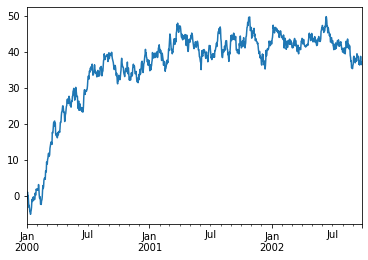

In [51]:
# time series plot
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

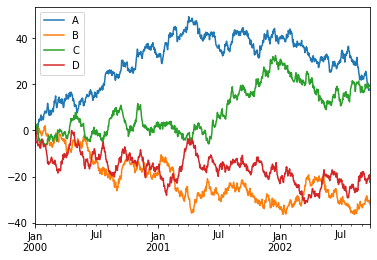

In [52]:
# plot with a data frame
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

In [57]:
# can also do Excel
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [58]:
newDf2 = pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])
newDf2.head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.445599,0.692888,-1.376719,1.888208
1,2000-01-02,-0.155321,1.293539,-0.836645,-0.014362
2,2000-01-03,0.597018,-0.222152,-0.205393,-0.727861
3,2000-01-04,1.000327,1.763657,1.119559,-1.189173
4,2000-01-05,-0.667963,1.843323,-0.119789,-2.150271


In [59]:
os.remove('foo.xlsx')

In [61]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 5 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
E    6 non-null object
dtypes: float64(4), object(1)
memory usage: 288.0+ bytes


In [62]:
df3.head()

,A,B,C,D,E
2013-01-01,-0.372504,-1.020323,0.054175,1.561823,one
2013-01-02,1.599933,-0.118304,0.743783,0.082489,one
2013-01-03,-2.401080,-0.025153,-0.182527,1.787144,two
2013-01-04,-1.616429,1.332620,-1.734828,0.958703,three
2013-01-05,1.283551,0.640375,-2.052255,1.039804,four


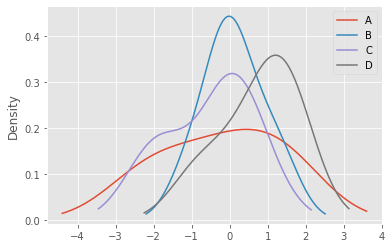

In [68]:
#desnsity
df3.plot.density()

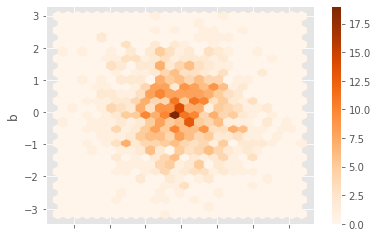

In [69]:
#hexagonal bin plot 

df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df.plot.hexbin(x='a',y='b',gridsize=25,cmap='Oranges')

In [ ]:
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm')

In [ ]:
df2.plot.bar(stacked=True)

In [ ]:
#Figure out how to increase the linewidth and make the linestyle dashed. (Note: You would usually not dash a kde plot line)

df3['d'].plot.density(lw=5,ls='--')

In [ ]:
f = plt.figure()
df3.ix[0:30].plot.area(alpha=0.4,ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Operations

There are lots of operations with pandas that will be really useful to you, but don't fall into any distinct category. Let's show them here in this lecture:

In [72]:
import pandas as pd
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


### Info on Unique Values

In [73]:
df['col2'].unique()

array([444, 555, 666])

In [74]:
df['col2'].nunique()

3

In [75]:
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

### Selecting Data

In [76]:
#Select from DataFrame using criteria from multiple columns
newdf = df[(df['col1']>2) & (df['col2']==444)]

In [77]:
newdf

,col1,col2,col3
3,4,444,xyz


### Applying Functions

In [78]:
def times2(x):
    return x*2

In [79]:
df['col1'].apply(times2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [80]:
df['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [81]:
df['col1'].sum()

10

** Permanently Removing a Column**

In [82]:
del df['col1']

In [83]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


** Get column and index names: **

In [84]:
df.columns

Index(['col2', 'col3'], dtype='object')

In [85]:
df.index

RangeIndex(start=0, stop=4, step=1)

** Sorting and Ordering a DataFrame:**

In [86]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [87]:
df.sort_values(by='col2') #inplace=False by default

,col2,col3
0,444,abc
3,444,xyz
1,555,def
2,666,ghi


** Find Null Values or Check for Null Values**

In [88]:
df.isnull()

,col2,col3
0,False,False
1,False,False
2,False,False
3,False,False


In [89]:
# Drop rows with NaN Values
df.dropna()

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


** Filling in NaN values with something else: **

In [90]:
import numpy as np

In [91]:
df = pd.DataFrame({'col1':[1,2,3,np.nan],
                   'col2':[np.nan,555,666,444],
                   'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [92]:
df.fillna('FILL')

,col1,col2,col3
0,1,FILL,abc
1,2,555,def
2,3,666,ghi
3,FILL,444,xyz


In [93]:
data = {'A':['foo','foo','foo','bar','bar','bar'],
     'B':['one','one','two','two','one','one'],
       'C':['x','y','x','y','x','y'],
       'D':[1,3,2,5,4,1]}

df = pd.DataFrame(data)

In [94]:
df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [95]:
df.pivot_table(values='D',index=['A', 'B'],columns=['C'])

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

# Great Job!

___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Missing Data

Let's show a few convenient methods to deal with Missing Data in pandas:

In [96]:
import numpy as np
import pandas as pd

In [97]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [98]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [99]:
df.dropna()

,A,B,C
0,1.0,5.0,1


In [100]:
df.dropna(axis=1)

,C
0,1
1,2
2,3


In [101]:
df.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [102]:
df.fillna(value='FILL VALUE')

,A,B,C
0,1,5,1
1,2,FILL VALUE,2
2,FILL VALUE,FILL VALUE,3


In [103]:
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

# Merging, Joining, and Concatenating

There are 3 main ways of combining DataFrames together: Merging, Joining and Concatenating. In this lecture we will discuss these 3 methods with examples.

____

### Example DataFrames

In [104]:
import pandas as pd

In [105]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

In [106]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

In [107]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [108]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [109]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [110]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


## Concatenation

Concatenation basically glues together DataFrames. Keep in mind that dimensions should match along the axis you are concatenating on. You can use **pd.concat** and pass in a list of DataFrames to concatenate together:

In [111]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [112]:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


_____
## Example DataFrames

In [113]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})    

In [114]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [115]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


___

## Merging

The **merge** function allows you to merge DataFrames together using a similar logic as merging SQL Tables together. For example:

In [116]:
pd.merge(left,right,how='inner',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


Or to show a more complicated example:

In [117]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [118]:
pd.merge(left, right, on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [119]:
pd.merge(left, right, how='outer', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [120]:
pd.merge(left, right, how='right', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [121]:
pd.merge(left, right, how='left', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


## Joining
Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame.

In [122]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [123]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [124]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


# Groupby

The groupby method allows you to group rows of data together and call aggregate functions

In [125]:
import pandas as pd
# Create dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}

In [126]:
df = pd.DataFrame(data)

In [127]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


** Now you can use the .groupby() method to group rows together based off of a column name. For instance let's group based off of Company. This will create a DataFrameGroupBy object:**

In [128]:
df.groupby('Company')

You can save this object as a new variable:

In [129]:
by_comp = df.groupby("Company")

And then call aggregate methods off the object:

In [130]:
by_comp.mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [131]:
df.groupby('Company').mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


More examples of aggregate methods:

In [132]:
by_comp.std()

,Sales
Company,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [133]:
by_comp.min()

,Person,Sales
Company,,
FB,Carl,243
GOOG,Charlie,120
MSFT,Amy,124


In [134]:
by_comp.max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


In [135]:
by_comp.count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [136]:
by_comp.describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [137]:
by_comp.describe().transpose()

Company              FB        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   296.500000  160.000000  232.000000
      std     75.660426   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    269.750000  140.000000  178.000000
      50%    296.500000  160.000000  232.000000
      75%    323.250000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

In [138]:
by_comp.describe().transpose()['GOOG']

Sales  count      2.000000
       mean     160.000000
       std       56.568542
       min      120.000000
       25%      140.000000
       50%      160.000000
       75%      180.000000
       max      200.000000
Name: GOOG, dtype: float64

# DataFrames

DataFrames are the workhorse of pandas and are directly inspired by the R programming language. We can think of a DataFrame as a bunch of Series objects put together to share the same index. Let's use pandas to explore this topic!

In [139]:
import pandas as pd
import numpy as np

In [140]:
from numpy.random import randn
np.random.seed(101)

In [141]:
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())

In [142]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


## Selection and Indexing

Let's learn the various methods to grab data from a DataFrame

In [143]:
df['W']

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [144]:
# Pass a list of column names
df[['W','Z']]

,W,Z
A,2.706850,0.503826
B,0.651118,0.605965
C,-2.018168,-0.589001
D,0.188695,0.955057
E,0.190794,0.683509


In [145]:
# SQL Syntax (NOT RECOMMENDED!)
df.W

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

DataFrame Columns are just Series

In [146]:
type(df['W'])

pandas.core.series.Series

**Creating a new column:**

In [147]:
df['new'] = df['W'] + df['Y']

In [148]:
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


** Removing Columns**

In [149]:
df.drop('new',axis=1)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [150]:
# Not inplace unless specified!
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [151]:
df.drop('new',axis=1,inplace=True)

In [152]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


Can also drop rows this way:

In [153]:
df.drop('E',axis=0)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


** Selecting Rows**

In [154]:
df.loc['A']

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

Or select based off of position instead of label 

In [155]:
df.iloc[2]

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

** Selecting subset of rows and columns **

In [156]:
df.loc['B','Y']

-0.8480769834036315

In [157]:
df.loc[['A','B'],['W','Y']]

,W,Y
A,2.706850,0.907969
B,0.651118,-0.848077


### Conditional Selection

An important feature of pandas is conditional selection using bracket notation, very similar to numpy:

In [158]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [159]:
df>0

,W,X,Y,Z
A,True,True,True,True
B,True,False,False,True
C,False,True,True,False
D,True,False,False,True
E,True,True,True,True


In [160]:
df[df>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [161]:
df[df['W']>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [162]:
df[df['W']>0]['Y']

A    0.907969
B   -0.848077
D   -0.933237
E    2.605967
Name: Y, dtype: float64

In [163]:
df[df['W']>0][['Y','X']]

,Y,X
A,0.907969,0.628133
B,-0.848077,-0.319318
D,-0.933237,-0.758872
E,2.605967,1.978757


For two conditions you can use | and & with parenthesis:

In [164]:
df[(df['W']>0) & (df['Y'] > 1)]

,W,X,Y,Z
E,0.190794,1.978757,2.605967,0.683509


## More Index Details

Let's discuss some more features of indexing, including resetting the index or setting it something else. We'll also talk about index hierarchy!

In [165]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [166]:
# Reset to default 0,1...n index
df.reset_index()

,index,W,X,Y,Z
0,A,2.706850,0.628133,0.907969,0.503826
1,B,0.651118,-0.319318,-0.848077,0.605965
2,C,-2.018168,0.740122,0.528813,-0.589001
3,D,0.188695,-0.758872,-0.933237,0.955057
4,E,0.190794,1.978757,2.605967,0.683509


In [167]:
newind = 'CA NY WY OR CO'.split()

In [168]:
df['States'] = newind

In [169]:
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [170]:
df.set_index('States')

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


In [171]:
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [172]:
df.set_index('States',inplace=True)

In [173]:
df

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


## Multi-Index and Index Hierarchy

Let us go over how to work with Multi-Index, first we'll create a quick example of what a Multi-Indexed DataFrame would look like:

In [174]:
# Index Levels
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [175]:
hier_index

MultiIndex([('G1', 1),
            ('G1', 2),
            ('G1', 3),
            ('G2', 1),
            ('G2', 2),
            ('G2', 3)],
           )

In [176]:
df = pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B'])
df

A         B
G1 1  0.302665  1.693723
   2 -1.706086 -1.159119
   3 -0.134841  0.390528
G2 1  0.166905  0.184502
   2  0.807706  0.072960
   3  0.638787  0.329646

Now let's show how to index this! For index hierarchy we use df.loc[], if this was on the columns axis, you would just use normal bracket notation df[]. Calling one level of the index returns the sub-dataframe:

In [177]:
df.loc['G1']

,A,B
1,0.302665,1.693723
2,-1.706086,-1.159119
3,-0.134841,0.390528


In [178]:
df.loc['G1'].loc[1]

A    0.302665
B    1.693723
Name: 1, dtype: float64

In [179]:
df.index.names

FrozenList([None, None])

In [180]:
df.index.names = ['Group','Num']

In [181]:
df

A         B
Group Num                    
G1    1    0.302665  1.693723
      2   -1.706086 -1.159119
      3   -0.134841  0.390528
G2    1    0.166905  0.184502
      2    0.807706  0.072960
      3    0.638787  0.329646

In [182]:
df.xs('G1')

,A,B
Num,,
1,0.302665,1.693723
2,-1.706086,-1.159119
3,-0.134841,0.390528


In [183]:
df.xs(['G1',1])

A    0.302665
B    1.693723
Name: (G1, 1), dtype: float64

In [184]:
df.xs(1,level='Num')

,A,B
Group,,
G1,0.302665,1.693723
G2,0.166905,0.184502


# Data Input and Output

This notebook is the reference code for getting input and output, pandas can read a variety of file types using its pd.read_ methods. Let's take a look at the most common data types:

In [185]:
import numpy as np
import pandas as pd

## CSV

### CSV Input

In [230]:
df = pd.read_csv('data/example')
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


### CSV Output

In [231]:
df.to_csv('example',index=False)

## Excel
Pandas can read and write excel files, keep in mind, this only imports data. Not formulas or images, having images or macros may cause this read_excel method to crash. 

## HTML

You may need to install htmllib5,lxml, and BeautifulSoup4. In your terminal/command prompt run:

    conda install lxml
    conda install html5lib
    conda install BeautifulSoup4

Then restart Jupyter Notebook.
(or use pip install if you aren't using the Anaconda Distribution)

Pandas can read table tabs off of html. For example:

### HTML Input

Pandas read_html function will read tables off of a webpage and return a list of DataFrame objects:

In [233]:
df = pd.read_html('http://www.fdic.gov/bank/individual/failed/banklist.html')

In [234]:
df[0]

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019","December 19, 2019"
1,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,"October 25, 2019","December 19, 2019"
2,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,"October 25, 2019","December 19, 2019"
3,The Enloe State Bank,Cooper,TX,10716,"Legend Bank, N. A.","May 31, 2019","December 19, 2019"
4,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017","July 24, 2019"
...,...,...,...,...,...,...,...
554,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001","August 19, 2014"
555,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001","November 18, 2002"
556,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001","February 18, 2003"
557,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000","March 17, 2005"



# Series

The first main data type we will learn about for pandas is the Series data type. Let's import Pandas and explore the Series object.

A Series is very similar to a NumPy array (in fact it is built on top of the NumPy array object). What differentiates the NumPy array from a Series, is that a Series can have axis labels, meaning it can be indexed by a label, instead of just a number location. It also doesn't need to hold numeric data, it can hold any arbitrary Python Object.

Let's explore this concept through some examples:

In [ ]:
import numpy as np
import pandas as pd

### Creating a Series

You can convert a list,numpy array, or dictionary to a Series:

In [ ]:
labels = ['a','b','c']
my_list = [10,20,30]
arr = np.array([10,20,30])
d = {'a':10,'b':20,'c':30}

** Using Lists**

In [ ]:
pd.Series(data=my_list)

In [ ]:
pd.Series(data=my_list,index=labels)

In [ ]:
pd.Series(my_list,labels)

** NumPy Arrays **

In [ ]:
pd.Series(arr)

In [ ]:
pd.Series(arr,labels)

** Dictionary**

In [ ]:
pd.Series(d)

### Data in a Series

A pandas Series can hold a variety of object types:

In [ ]:
pd.Series(data=labels)

In [ ]:
# Even functions (although unlikely that you will use this)
pd.Series([sum,print,len])

## Using an Index

The key to using a Series is understanding its index. Pandas makes use of these index names or numbers by allowing for fast look ups of information (works like a hash table or dictionary).

Let's see some examples of how to grab information from a Series. Let us create two sereis, ser1 and ser2:

In [ ]:
ser1 = pd.Series([1,2,3,4],index = ['USA', 'Germany','USSR', 'Japan'])                                   

In [ ]:
ser1

In [ ]:
ser2 = pd.Series([1,2,5,4],index = ['USA', 'Germany','Italy', 'Japan'])                                   

In [ ]:
ser2

In [ ]:
ser1['USA']

Operations are then also done based off of index:

In [ ]:
ser1 + ser2

** Hard: What are the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com, etc...) **


# Ecommerce Purchases Exercise

In this Exercise you will be given some Fake Data about some purchases done through Amazon! Just go ahead and follow the directions and try your best to answer the questions and complete the tasks. Feel free to reference the solutions. Most of the tasks can be solved in different ways. For the most part, the questions get progressively harder.


In [195]:
import pandas as pd

In [196]:
ecom = pd.read_csv('data/Ecommerce Purchases')

**Check the head of the DataFrame.**

In [197]:
ecom.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


** How many rows and columns are there? **

In [198]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
Address             10000 non-null object
Lot                 10000 non-null object
AM or PM            10000 non-null object
Browser Info        10000 non-null object
Company             10000 non-null object
Credit Card         10000 non-null int64
CC Exp Date         10000 non-null object
CC Security Code    10000 non-null int64
CC Provider         10000 non-null object
Email               10000 non-null object
Job                 10000 non-null object
IP Address          10000 non-null object
Language            10000 non-null object
Purchase Price      10000 non-null float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


** What is the average Purchase Price? **

In [199]:
ecom['Purchase Price'].mean()

50.34730200000025

** What were the highest and lowest purchase prices? **

In [200]:
ecom['Purchase Price'].max()

99.99

In [201]:
ecom['Purchase Price'].min()

0.0

** How many people have English 'en' as their Language of choice on the website? **

In [202]:
ecom[ecom['Language']=='en'].count()

Address             1098
Lot                 1098
AM or PM            1098
Browser Info        1098
Company             1098
Credit Card         1098
CC Exp Date         1098
CC Security Code    1098
CC Provider         1098
Email               1098
Job                 1098
IP Address          1098
Language            1098
Purchase Price      1098
dtype: int64

** How many people have the job title of "Lawyer" ? **


In [203]:
ecom[ecom['Job'] == 'Lawyer'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 470 to 9979
Data columns (total 14 columns):
Address             30 non-null object
Lot                 30 non-null object
AM or PM            30 non-null object
Browser Info        30 non-null object
Company             30 non-null object
Credit Card         30 non-null int64
CC Exp Date         30 non-null object
CC Security Code    30 non-null int64
CC Provider         30 non-null object
Email               30 non-null object
Job                 30 non-null object
IP Address          30 non-null object
Language            30 non-null object
Purchase Price      30 non-null float64
dtypes: float64(1), int64(2), object(11)
memory usage: 3.5+ KB


** How many people made the purchase during the AM and how many people made the purchase during PM ? **

**(Hint: Check out [value_counts()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) ) **

In [204]:
ecom['AM or PM'].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

** What are the 5 most common Job Titles? **

In [205]:
ecom['Job'].value_counts().head(5)

Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Research officer, political party    27
Purchasing manager                   27
Name: Job, dtype: int64

** Someone made a purchase that came from Lot: "90 WT" , what was the Purchase Price for this transaction? **

In [206]:
ecom[ecom['Lot']=='90 WT']['Purchase Price']

513    75.1
Name: Purchase Price, dtype: float64

** What is the email of the person with the following Credit Card Number: 4926535242672853 **

In [207]:
ecom[ecom["Credit Card"] == 4926535242672853]['Email'] 

1234    bondellen@williams-garza.com
Name: Email, dtype: object

** How many people have American Express as their Credit Card Provider *and* made a purchase above $95 ?**

In [208]:
ecom[(ecom['CC Provider']=='American Express') & (ecom['Purchase Price']>95)].count()

Address             39
Lot                 39
AM or PM            39
Browser Info        39
Company             39
Credit Card         39
CC Exp Date         39
CC Security Code    39
CC Provider         39
Email               39
Job                 39
IP Address          39
Language            39
Purchase Price      39
dtype: int64

** Hard: How many people have a credit card that expires in 2025? **

In [209]:
sum(ecom['CC Exp Date'].apply(lambda x: x[3:]) == '25')

1033

** Hard: What are the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com, etc...) **

In [210]:
ecom['Email'].apply(lambda x: x.split('@')[1]).value_counts().head(5)

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64

# SF Salaries Exercise

Welcome to a quick exercise for you to practice your pandas skills! We will be using the [SF Salaries Dataset](https://www.kaggle.com/kaggle/sf-salaries) from Kaggle!

** Import pandas as pd.**

In [211]:
import pandas as pd

** Read Salaries.csv as a dataframe called sal.**

In [213]:
sal = pd.read_csv('data/Salaries.csv')

** Check the head of the DataFrame. **

In [214]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


** Use the .info() method to find out how many entries there are.**

In [215]:
sal.info() # 148654 Entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

In [216]:
sal['BasePay'].mean()

66325.44884050643

** What is the highest amount of OvertimePay in the dataset ? **

In [217]:
sal['OvertimePay'].max()

245131.88

** What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll). **

In [218]:
sal[sal['EmployeeName']=='JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

** How much does JOSEPH DRISCOLL make (including benefits)? **

In [219]:
sal[sal['EmployeeName']=='JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

** What is the name of highest paid person (including benefits)?**

In [220]:
sal[sal['TotalPayBenefits']== sal['TotalPayBenefits'].max()] #['EmployeeName']
# or
# sal.loc[sal['TotalPayBenefits'].idxmax()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


** What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [221]:
sal[sal['TotalPayBenefits']== sal['TotalPayBenefits'].min()] #['EmployeeName']
# or
# sal.loc[sal['TotalPayBenefits'].idxmax()]['EmployeeName']

## ITS NEGATIVE!! VERY STRANGE

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


** What was the average (mean) BasePay of all employees per year? (2011-2014) ? **

In [222]:
sal.groupby('Year').mean()['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

** How many unique job titles are there? **

In [223]:
sal['JobTitle'].nunique()

2159

** What are the top 5 most common jobs? **

In [224]:
sal['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

** How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?) **

In [225]:
sum(sal[sal['Year']==2013]['JobTitle'].value_counts() == 1) # pretty tricky way to do this...

202

** How many people have the word Chief in their job title? (This is pretty tricky) **

In [226]:
def chief_string(title):
    if 'chief' in title.lower():
        return True
    else:
        return False

In [227]:
sum(sal['JobTitle'].apply(lambda x: chief_string(x)))

627

** Bonus: Is there a correlation between length of the Job Title string and Salary? **

In [228]:
sal['title_len'] = sal['JobTitle'].apply(len)

In [229]:
sal[['title_len','TotalPayBenefits']].corr() # No correlation.

,title_len,TotalPayBenefits
title_len,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


# Great Job!